# Multi-Variable Linear Regression

In [1]:
# importing required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

## Reading the dataset

In [2]:
def read_data():
    data = pd.read_csv('./Dataset/ex1data2.txt', header = None)
    return data

In [3]:
data = read_data()

shape = data.shape

# number of samples
m = shape[0]

# number of features
n = shape[1]
n -= 1

#checking shape of data
print(m, n)

47 2


In [4]:
# storing sample labels for later use
def update_data(data):
    label_data = data[len(data.columns)-1]

    # dropping the label column
    data.drop(data.columns[len(data.columns)-1], axis=1, inplace=True)
    return label_data

In [5]:
# getting the data labels
label_data = update_data(data)

## Feature Normalization: Mean Normalization

Calculating means of all the features in the dataset. 

In [6]:
def cal_feature_means(data):
    feature_means = []
    for i in range(n):
        feature_means.append(data[i].mean())
    
    return feature_means

In [7]:
feature_means = cal_feature_means(data)

print(feature_means)

[2000.6808510638298, 3.1702127659574466]


Subtracting feature means for their respective feature values

In [8]:
def norm_mean(feature_means, data):
    for i in range(n):
        data[i] -= feature_means[i]

Calculating std (standard deviation) of all the features in the dataset.

In [9]:
def cal_feature_std(data):
    feature_std = []
    for i in range(n):
        feature_std.append(data[i].std())
        
    return feature_std

In [10]:
feature_std = cal_feature_std(data)

print(feature_std)

[794.7023535338897, 0.7609818867800999]


In [11]:
def norm_std(feature_std, data):
    for i in range(n):
        data[i] /= feature_std[i]

In [12]:
# function to scal features
def scale_features(data):
    feature_means = cal_feature_means(data)
    norm_mean(feature_means, data)
    feature_std = cal_feature_std(data)
    norm_std(feature_std, data)

In [13]:
# scaling the features
scale_features(data)

print(data)

           0         1
0   0.130010 -0.223675
1  -0.504190 -0.223675
2   0.502476 -0.223675
3  -0.735723 -1.537767
4   1.257476  1.090417
5  -0.019732  1.090417
6  -0.587240 -0.223675
7  -0.721881 -0.223675
8  -0.781023 -0.223675
9  -0.637573 -0.223675
10 -0.076357  1.090417
11 -0.000857 -0.223675
12 -0.139273 -0.223675
13  3.117292  2.404508
14 -0.921956 -0.223675
15  0.376643  1.090417
16 -0.856523 -1.537767
17 -0.962223 -0.223675
18  0.765468  1.090417
19  1.296484  1.090417
20 -0.294048 -0.223675
21 -0.141790 -1.537767
22 -0.499157 -0.223675
23 -0.048673  1.090417
24  2.377392 -0.223675
25 -1.133356 -0.223675
26 -0.682873 -0.223675
27  0.661026 -0.223675
28  0.250810 -0.223675
29  0.800701 -0.223675
30 -0.203448 -1.537767
31 -1.259189 -2.851859
32  0.049477  1.090417
33  1.429868 -0.223675
34 -0.238682  1.090417
35 -0.709298 -0.223675
36 -0.958448 -0.223675
37  0.165243  1.090417
38  2.786350  1.090417
39  0.202993  1.090417
40 -0.423657 -1.537767
41  0.298626 -0.223675
42  0.71261

Adding dummy value of '1' to all feature vectors for dot-product.

In [14]:
data.insert(0, 'dummy', 1)

In [15]:
# transforming to np-arrays for dot product
X = np.array(data)

thetas = [0] * (n+1)

teetas = np.array(thetas)

label_data = np.array(label_data)
label_data.flatten()

array([399900, 329900, 369000, 232000, 539900, 299900, 314900, 198999,
       212000, 242500, 239999, 347000, 329999, 699900, 259900, 449900,
       299900, 199900, 499998, 599000, 252900, 255000, 242900, 259900,
       573900, 249900, 464500, 469000, 475000, 299900, 349900, 169900,
       314900, 579900, 285900, 249900, 229900, 345000, 549000, 287000,
       368500, 329900, 314000, 299000, 179900, 299900, 239500],
      dtype=int64)

## Cost Function

In [16]:
# Function to calculate cost of each iteration
def calc_cost(X, label_data, thetas, m):
    cost = np.sum((X.dot(thetas) - label_data)**2)
    cost *= 2
    cost /= m
    return cost

## Batch Gradient Descent

In [17]:
def batch_grad_Descent(X, label_data, thetas, m, iterations, alpha):
    cost = calc_cost(X, label_data, thetas, m)
    i = 0
    
    # cost of each iteration
    cost_list = [0] * iterations
    
    while(i < iterations and cost > 0):
        cost_list[i] = cost
        print(cost)
        hypothesis = X.dot(thetas)
        loss = hypothesis - label_data
        slope = X.T.dot(loss)
        slope /= m
        thetas = thetas - (slope*alpha)
        cost = calc_cost(X, label_data, thetas, m)
        i += 1
        
    return thetas, cost_list

In [18]:
# declaring variables
iterations = 5000
alpha = 0.009

In [19]:
(thetas, cost_list) = batch_grad_Descent(X, label_data, thetas, m , iterations, alpha)

262366192425.82977
257716875717.29358
253154626971.21588
248677774354.18234
244284679108.5962
239973734874.33936
235743367024.9314
231592032017.86176
227518216758.77887
223520437979.2279
219597241627.6357
215747202273.2468
211968922522.7247
208261032449.13605
204622189033.04385
201051075615.44025
197546401362.25888
194106900740.20883
190731333003.68134
187418481692.48474
184167154140.1687
180976180992.70462
177844415737.2949
174770734241.08792
171754034299.58173
168793235194.5032
165887277260.9565
163035121463.6363
160235748981.90878
157488160803.56638
154791377327.06674
152144437972.07114
149546400798.10196
146996342131.14197
144493356198.0034
142036554768.29742
139625066803.8402
137258038115.33328
134934631026.16173
132654024043.15546
130415411534.16383
128218003412.29614
126061024826.6843
123943715859.62743
121865331229.98099
119825140002.65585
117822425304.09702
115856484043.61203
113926626640.42589
112032176756.338
110172471033.8622
108346858839.73254
106554702013.66039
1047953746

8177839781.153288
8177803122.263284
8177766749.572602
8177730660.820886
8177694853.766096
8177659326.184358
8177624075.869782
8177589100.634342
8177554398.307697
8177519966.7370615
8177485803.787039
8177451907.33948
8177418275.29334
8177384905.564532
8177351796.085779
8177318944.806475
8177286349.692547
8177254008.726304
8177221919.906315
8177190081.247257
8177158490.779784
8177127146.550398
8177096046.621309
8177065189.070302
8177034571.990614
8177004193.490793
8176974051.694579
8176944144.740768
8176914470.7831
8176885027.990109
8176855814.545031
8176826828.645656
8176798068.504215
8176769532.34726
8176741218.415538
8176713124.963892
8176685250.261118
8176657592.589855
8176630150.246499
8176602921.541039
8176575904.796984
8176549098.3512335
8176522500.5539665
8176496109.768534
8176469924.371356
8176443942.7518
8176418163.31209
8176392584.467174
8176367204.644656
8176342022.2846575
8176317035.839732
8176292243.774761
8176267644.566843
8176243236.705205
8176219018.691092
8176194989.037

8173150875.693454
8173150638.371766
8173150402.88627
8173150169.222754
8173149937.367124
8173149707.3053875
8173149479.023677
8173149252.508203
8173149027.745311
8173148804.721436
8173148583.423123
8173148363.837027
8173148145.949893
8173147929.748579
8173147715.220042
8173147502.3513365
8173147291.129623
8173147081.542156
8173146873.576291
8173146667.219486
8173146462.459285
8173146259.283339
8173146057.679385
8173145857.635263
8173145659.138909
8173145462.178348
8173145266.741684
8173145072.817142
8173144880.393012
8173144689.457692
8173144499.999656
8173144312.007482
8173144125.469816
8173143940.375418
8173143756.713117
8173143574.471827
8173143393.640556
8173143214.208399
8173143036.164525
8173142859.498194
8173142684.19875
8173142510.255616
8173142337.658297
8173142166.396383
8173141996.45954
8173141827.837515
8173141660.520131
8173141494.497303
8173141329.759007
8173141166.295306
8173141004.096341
8173140843.152329
8173140683.453552
8173140524.990382
8173140367.753259
8173140211.

8173120443.328826
8173120441.464839
8173120439.61527
8173120437.780012
8173120435.958952
8173120434.151988
8173120432.358998
8173120430.579882
8173120428.814531
8173120427.062842
8173120425.3247
8173120423.600012
8173120421.888662
8173120420.190561
8173120418.50559
8173120416.833661
8173120415.174665
8173120413.528506
8173120411.895084
8173120410.2743
8173120408.666055
8173120407.070254
8173120405.486795
8173120403.915591
8173120402.356546
8173120400.80956
8173120399.274548
8173120397.751404
8173120396.240051
8173120394.740388
8173120393.252329
8173120391.7757845
8173120390.310664
8173120388.856876
8173120387.41434
8173120385.982966
8173120384.562662
8173120383.153349
8173120381.754937
8173120380.3673525
8173120378.990498
8173120377.624296
8173120376.268666
8173120374.923523
8173120373.588789
8173120372.26438
8173120370.95022
8173120369.646231
8173120368.352326
8173120367.068431
8173120365.794474
8173120364.530371
8173120363.276048
8173120362.031433
8173120360.796441
8173120359.571009


8173120204.621571
8173120204.604467
8173120204.5875
8173120204.570662
8173120204.553952
8173120204.537377
8173120204.520927
8173120204.504605
8173120204.48841
8173120204.472341
8173120204.456392
8173120204.44057
8173120204.42487
8173120204.40929
8173120204.393834
8173120204.378497
8173120204.363274
8173120204.348169
8173120204.333187
8173120204.318317
8173120204.30356
8173120204.288921
8173120204.274396
8173120204.25998
8173120204.245678
8173120204.2314825
8173120204.217401
8173120204.203426
8173120204.189565
8173120204.175803
8173120204.162152
8173120204.148606
8173120204.13516
8173120204.121826
8173120204.108589
8173120204.095458
8173120204.08243
8173120204.069497
8173120204.05667
8173120204.043941
8173120204.03131
8173120204.018778
8173120204.006334
8173120203.993998
8173120203.9817505
8173120203.969602
8173120203.957543
8173120203.9455805
8173120203.933711
8173120203.921932
8173120203.910245
8173120203.898644
8173120203.887139
8173120203.875722
8173120203.864393
8173120203.853146
8

8173120202.459337
8173120202.458963
8173120202.458596
8173120202.45823
8173120202.457868
8173120202.457508
8173120202.45715
8173120202.456798
8173120202.456443
8173120202.456095
8173120202.455746
8173120202.455407
8173120202.455064
8173120202.454722
8173120202.454389
8173120202.454054
8173120202.453725
8173120202.453395
8173120202.453069
8173120202.452745
8173120202.452428
8173120202.452109
8173120202.451793
8173120202.45148
8173120202.451168
8173120202.45086
8173120202.450552
8173120202.450252
8173120202.449951
8173120202.449653
8173120202.449355
8173120202.4490595
8173120202.448768
8173120202.448477
8173120202.448188
8173120202.447905
8173120202.447621
8173120202.44734
8173120202.447063
8173120202.446787
8173120202.446509
8173120202.446241
8173120202.445967
8173120202.4457
8173120202.445436
8173120202.445172
8173120202.44491
8173120202.444651
8173120202.44439
8173120202.444136
8173120202.44388
8173120202.443628
8173120202.443378
8173120202.443132
8173120202.442885
8173120202.44264
81

8173120202.412495
8173120202.412487
8173120202.412477
8173120202.412465
8173120202.412457
8173120202.412448
8173120202.412439
8173120202.412432
8173120202.412424
8173120202.412418
8173120202.412405
8173120202.412397
8173120202.41239
8173120202.412381
8173120202.412373
8173120202.412364
8173120202.412356
8173120202.412347
8173120202.412342
8173120202.412333
8173120202.412324
8173120202.412314
8173120202.41231
8173120202.412304
8173120202.412293
8173120202.412289
8173120202.412282
8173120202.412271
8173120202.412263
8173120202.412257
8173120202.41225
8173120202.412242
8173120202.412235
8173120202.412227
8173120202.412221
8173120202.412212
8173120202.412207
8173120202.412199
8173120202.412192
8173120202.412184
8173120202.412178
8173120202.412175
8173120202.412167
8173120202.412157
8173120202.412152
8173120202.412146
8173120202.412142
8173120202.412135
8173120202.412128
8173120202.412121
8173120202.412114
8173120202.412109
8173120202.412102
8173120202.412098
8173120202.412091
8173120202.41

8173120202.411329
8173120202.411327
8173120202.411327
8173120202.411326
8173120202.41133
8173120202.411327
8173120202.411327
8173120202.411326
8173120202.411326
8173120202.411329
8173120202.411327
8173120202.411327
8173120202.411327
8173120202.411327
8173120202.411326
8173120202.411327
8173120202.411326
8173120202.411327
8173120202.411326
8173120202.411326
8173120202.411327
8173120202.411326
8173120202.411326
8173120202.411326
8173120202.411323
8173120202.411326
8173120202.411327
8173120202.411324
8173120202.411325
8173120202.411325
8173120202.411323
8173120202.411324
8173120202.411324
8173120202.411326
8173120202.411326
8173120202.411324
8173120202.411324
8173120202.411324
8173120202.411325
8173120202.411325
8173120202.411325
8173120202.411325
8173120202.411323
8173120202.411324
8173120202.411324
8173120202.411324
8173120202.411323
8173120202.411324
8173120202.411325
8173120202.411323
8173120202.411321
8173120202.411324
8173120202.411325
8173120202.411325
8173120202.411324
8173120202.

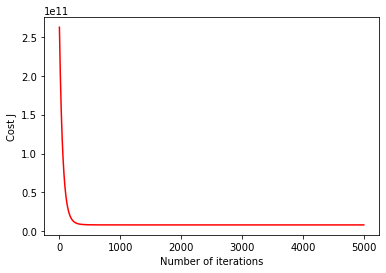

In [20]:
plt.plot(list(range(iterations)), cost_list, '-r')

# labelling the x and y axis
plt.xlabel("Number of iterations")
plt.ylabel("Cost J")

# plotting the graph
plt.show()

## Prediction

In [21]:
# test features 
house_size = 1650
bedrooms = 3

features = [house_size, bedrooms]

In [22]:
# scaling the test features for gradient descent
for i in range(n):
    features[i] -= feature_means[i]
    
for i in range(n):
    features[i] /= feature_std[i]

print(features)

[-0.4412732005944351, -0.2236751871685913]


In [23]:
# adding dummy value of '1' to the feature list for dot product
features.insert(0, 1)

features = np.array(features)

print(features)

[ 1.         -0.4412732  -0.22367519]


In [24]:
def prediction(thetas, features):
    price = thetas.dot(features)
    return price

In [25]:
price = prediction(thetas, features)

print("The predicted price is: ", round(price))

The predicted price is:  293081.0


## Normal Equation

For Normal Equation, we do not need scaled features. 
We could either read the dataset again or de-scale the features.

Reading the data again

In [26]:
data = read_data()

# storing sample labels in a variable for later use
label_data = data[len(data.columns)-1]

# dropping the label column
data.drop(data.columns[len(data.columns)-1], axis=1, inplace=True)

# add dummy value of 1 in the first column of X matrix for dota product
data.insert(0, 'dummy', 1)

# convert it to np array
X = np.array(data)

In [27]:
# create array of features to predict
features = np.array([1, 1650, 3])

print(features)

[   1 1650    3]


## Finding thetas using normal equation.

Normal equation: ((X^T.X)^-1).X^T.y

X^T = X transpose, ^-1 means inverse of the expression in the parenthesis.

In [28]:
# calculating thetas using normal equation
def calc_theta_neq(X, label_data):
     # normal equation
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(label_data)
    return theta

In [29]:
theta = calc_theta_neq(X, label_data)
print(theta)

[89597.9095428    139.21067402 -8738.01911233]


In [30]:
# make prediction
price = prediction(theta, features)
print("The predicted price is: ", round(price))

The predicted price is:  293081.0


## Price predicted using both methods is the same, i.e. 293081.
## Best value of alpha = 0.009, iterations = 5000